<a href="https://colab.research.google.com/github/dhruv-shindhe/TrafficSignClassfication_CovNet/blob/master/TrafficSignClassConNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import pickle
import pandas as pd
import cv2

In [0]:
np.random.seed(0)


In [0]:
with open('german-traffic-signs/test.p','rb') as f:
    test_data=pickle.load(f)
with open('german-traffic-signs/train.p','rb') as f:
    train_data=pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
    val_data=pickle.load(f)
    

In [0]:
print(type(test_data))

<class 'dict'>


In [0]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

In [0]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

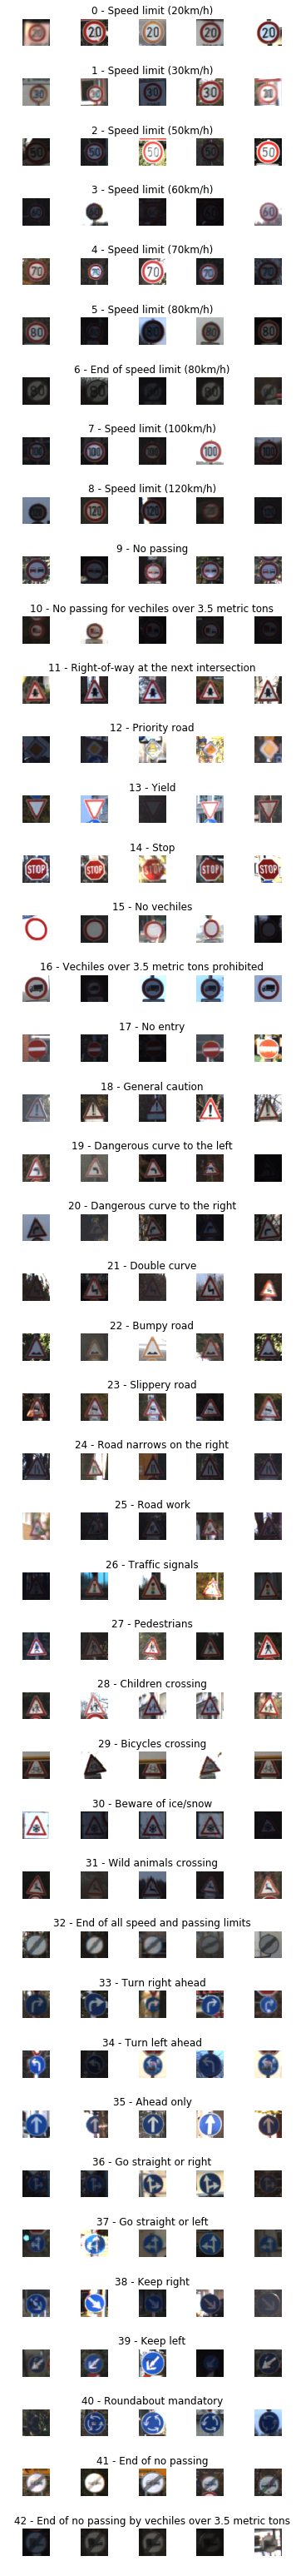

In [0]:
num_of_samples=[]
 
cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,43))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " - " + row["SignName"])
            num_of_samples.append(len(x_selected))

In [0]:
print(X_train[1000].shape)

(32, 32, 3)


(32, 32, 3)
36


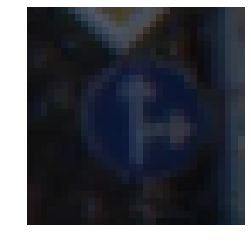

In [0]:
import cv2


img = X_train[1000]
plt.imshow(img)
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32, 3)
36


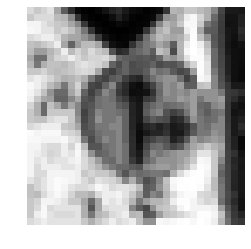

In [0]:

def greyscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocess(img):
    img = greyscale(img)
    img = equalize(img)
    img = img/255
    return img

img =preprocess(X_train[1000]) 
plt.imshow(img,cmap='Greys')
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

In [0]:
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))

In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [0]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [0]:
print(y_train()

[41 41 41 ... 25 25 25]


In [0]:
model = Sequential()
model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
model.add(Conv2D(60, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(30, (3, 3), activation='relu'))
model.add(Conv2D(30, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
  
  
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 4, 4, 30)          0         
__________

In [0]:
model.fit(X_train,y_train,epochs=10,validation_data=[X_val,y_val],batch_size=400,verbose=1,shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 7s 200us/step - loss: 2.3429 - acc: 0.3653 - val_loss: 0.7171 - val_acc: 0.8129
Epoch 2/10
34799/34799 [==============================] - 5s 147us/step - loss: 0.6634 - acc: 0.7969 - val_loss: 0.3050 - val_acc: 0.9041
Epoch 3/10
34799/34799 [==============================] - 5s 146us/step - loss: 0.3783 - acc: 0.8834 - val_loss: 0.2065 - val_acc: 0.9383
Epoch 4/10
34799/34799 [==============================] - 5s 147us/step - loss: 0.2703 - acc: 0.9160 - val_loss: 0.1845 - val_acc: 0.9499
Epoch 5/10
34799/34799 [==============================] - 5s 146us/step - loss: 0.2160 - acc: 0.9312 - val_loss: 0.1408 - val_acc: 0.9628
Epoch 6/10
34799/34799 [==============================] - 5s 146us/step - loss: 0.1740 - acc: 0.9452 - val_loss: 0.1223 - val_acc: 0.9719
Epoch 7/10
34799/34799 [==============================] - 5s 146us/step - loss: 0.1503 - acc: 0.9520 - val_loss: 0.1151 - v

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.13344866439511355
Test accuracy: 0.9620744260171058


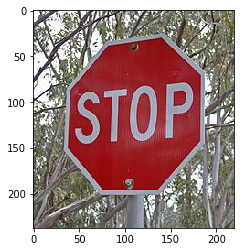

In [0]:
import requests
from PIL import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/STOP_sign.jpg/220px-STOP_sign.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


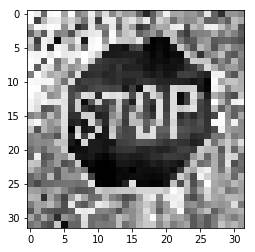

In [0]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)

In [0]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [14]
